# **Setup**

* https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
* https://www.youtube.com/watch?v=ZqpSb5p1xQo

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob
from IPython.display import Audio

import librosa
from librosa import display
from itertools import cycle

sns.set_theme(style='white',palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# **Data Import**

In [4]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


  0%|          | 0.00/429M [00:00<?, ?B/s]
  0%|          | 1.00M/429M [00:00<03:41, 2.03MB/s]
  1%|          | 3.00M/429M [00:00<01:15, 5.92MB/s]
  1%|          | 5.00M/429M [00:00<00:57, 7.67MB/s]
  2%|▏         | 7.00M/429M [00:00<00:46, 9.44MB/s]
  2%|▏         | 9.00M/429M [00:01<00:43, 10.1MB/s]
  3%|▎         | 11.0M/429M [00:01<00:39, 11.0MB/s]
  3%|▎         | 13.0M/429M [00:01<00:36, 12.0MB/s]
  3%|▎         | 15.0M/429M [00:01<00:35, 12.2MB/s]
  4%|▍         | 17.0M/429M [00:01<00:34, 12.6MB/s]
  4%|▍         | 19.0M/429M [00:01<00:34, 12.4MB/s]
  5%|▍         | 21.0M/429M [00:02<00:33, 12.8MB/s]
  5%|▌         | 23.0M/429M [00:02<00:32, 13.0MB/s]
  6%|▌         | 25.0M/429M [00:02<00:33, 12.8MB/s]
  6%|▋         | 27.0M/429M [00:02<00:32, 12.9MB/s]
  7%|▋         | 29.0M/429M [00:02<00:33, 12.4MB/s]
  7%|▋         | 31.0M/429M [00:02<00:33, 12.4MB/s]
  8%|▊         | 33.0M/429M [00:03<00:32, 12.7MB/s]
  8%|▊         | 35.0M/429M [00:03<00:35, 11.6MB/s]
  9%|▊         | 37.

# **Audio Data Basic**

## **Frequency**

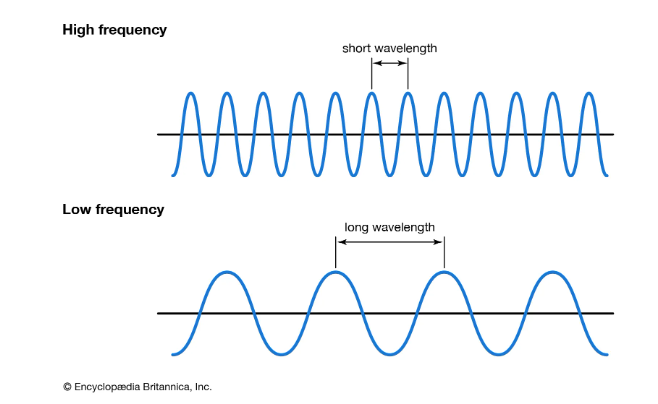

## **Intensity**
* Describes the amplitude (Height) of sound wave

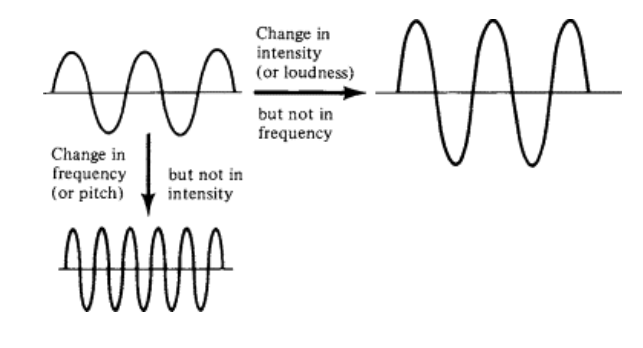

## **Sample Rate**

* Increasing the audio bit depth, along with increasing the audio sample rate, creates more total points to reconstruct the analog wave.

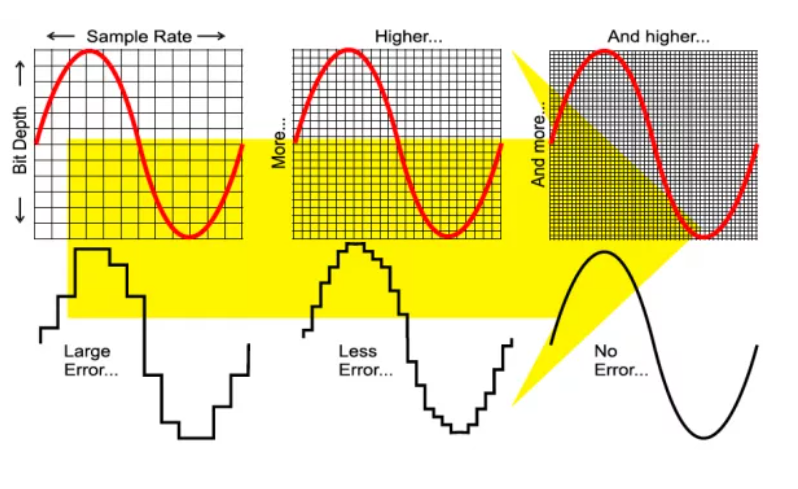

# **Reading Audio Files**

In [6]:
audio_files = glob('Input Data/*/*.wav')

# Display Audio File
Audio(audio_files[0])

In [8]:
y, sr = librosa.load(audio_files[0])

print('Sample Rate: ',sr)
print('Data Array Shape: ',y.shape)
print('Audio File Raw Data: ','\n',y)

Sample Rate:  22050
Data Array Shape:  (72838,)
Audio File Raw Data:  
 [ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09 ...  4.8083174e-14
 -9.6233243e-15  2.8714739e-14]


# **Plot Audio Data**

## **Pandas Plotting**

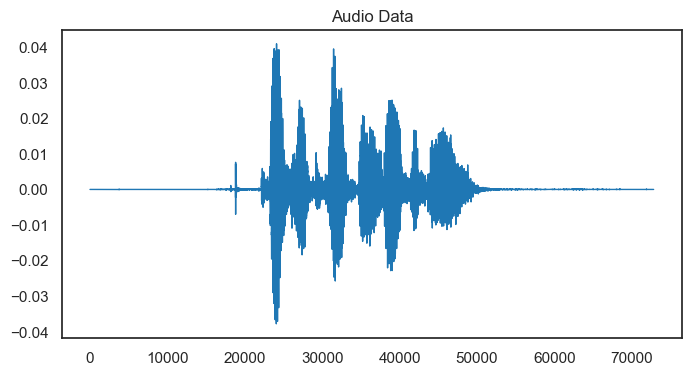

In [15]:
pd.Series(y).plot(figsize=(8,4),lw=1,title='Audio Data',color=color_pal[0])
plt.show()

## **Zoomed In Data**

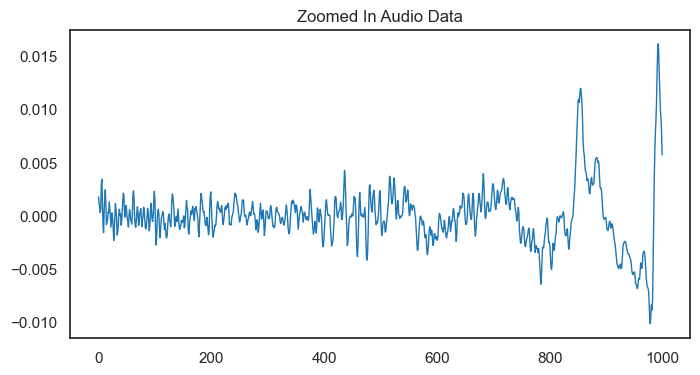

In [26]:
# From 30000 - 31000
pd.Series(y[30000:31000]).plot(figsize=(8,4),lw=1,title='Zoomed In Audio Data',color=color_pal[0])
plt.show()

# **Librosa Effects**

* https://librosa.org/doc/main/effects.html#

## **Trim Effect**

Original Data Shape:  (72838,)


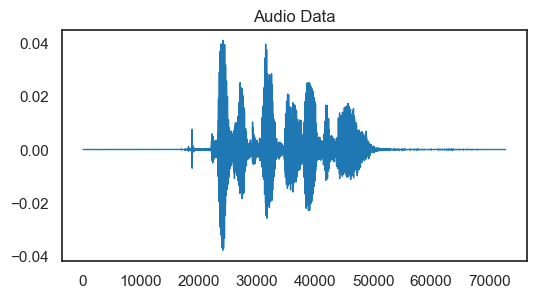

Trimmed Data Shape:  (33280,)


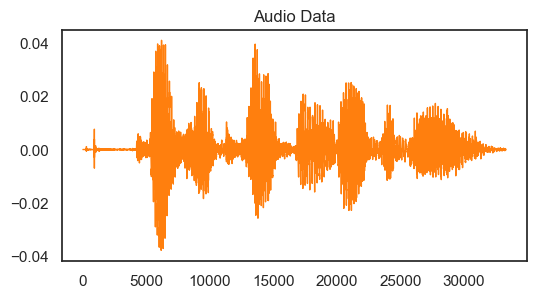

In [24]:
print('Original Data Shape: ',y.shape)
pd.Series(y).plot(figsize=(6,3),lw=1,title='Audio Data',color=color_pal[0])
plt.show()

# Trim Audio Data
y_trimmed, _ = librosa.effects.trim(y,top_db=35)
print('Trimmed Data Shape: ',y_trimmed.shape)

pd.Series(y_trimmed).plot(figsize=(6,3),lw=1,title='Audio Data',color=color_pal[1])
plt.show()

# **Frequency Domain Conversion**

## **Conversion**

In [28]:
print('Original Data Shape: ',y.shape)

# Convert Time Domain Signal To Frequency Domain Signal
y_freq = librosa.stft(y)
print('Frequency Domain Data Shape: ',y_freq.shape)


# Convert Amplitude To Decibel Scale
y_freq_db = librosa.amplitude_to_db(y_freq,ref=np.max)
print('Frequency Domain Data With Decibel Scale Shape: ',y_freq_db.shape)

Original Data Shape:  (72838,)
Frequency Domain Data Shape:  (1025, 143)
Frequency Domain Data With Decibel Scale Shape:  (1025, 143)


C:\Users\aksha\AppData\Local\Temp\ipykernel_35092\662744208.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  y_freq_db = librosa.amplitude_to_db(y_freq,ref=np.max)


## **Spectrogram Plotting**

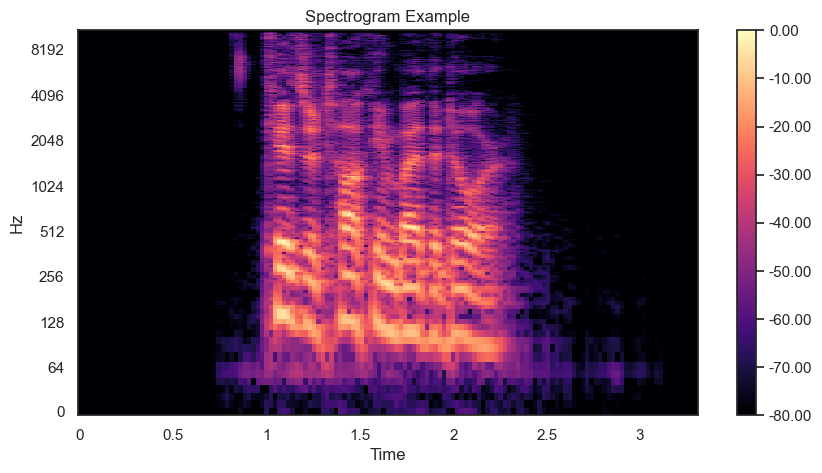

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(y_freq_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectrogram Example')
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

# **MLL Spectrogram**

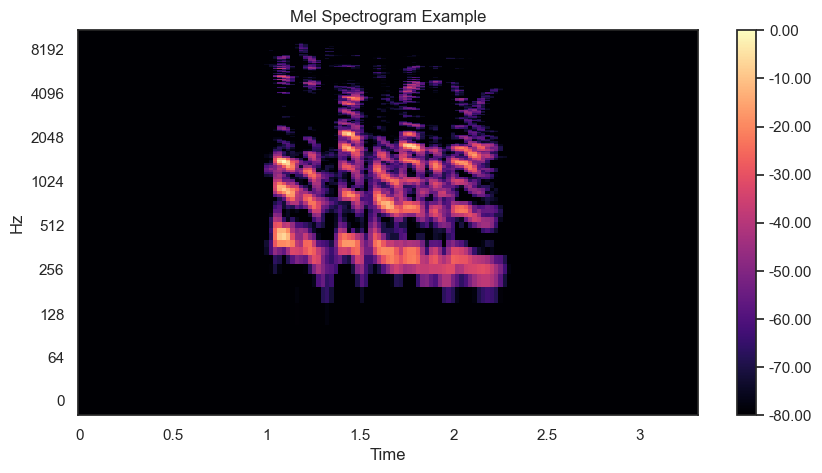

In [38]:
# Convert To Frequency Domain Signal
y_freq_mel = librosa.feature.melspectrogram(y=y,sr=sr,n_mels=256)

# Convert Amplitude to DB Scale
y_freq_mel_db = librosa.amplitude_to_db(y_freq_mel,ref=np.max)

# Plot Spectrogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(y_freq_mel_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Mel Spectrogram Example')
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()